In [6]:
# Core data + math
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

# For later (we'll use these in next parts)
from sklearn.model_selection import train_test_split


In [7]:
import os

print(os.listdir())  # List files in current folder


['Miniforge3-25.11.0-0-MacOSX-arm64.sh', 'readmission_model.pkl', 'diabetic_data.csv', 'diabetes_project.ipynb']


In [8]:
data_path = "diabetic_data.csv"  # make sure this matches the actual filename

try:
    df = pd.read_csv(data_path)
    print("✅ Data loaded successfully!")
    print("Shape of dataset:", df.shape)
except FileNotFoundError:
    print("❌ Could not find the file. Please check the filename and path.")


✅ Data loaded successfully!
Shape of dataset: (101766, 50)


In [9]:
# View first 5 rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
# Check how many missing values per column
df.isna().sum().sort_values(ascending=False).head(20)


max_glu_serum          96420
A1Cresult              84748
encounter_id               0
nateglinide                0
glimepiride                0
acetohexamide              0
glipizide                  0
glyburide                  0
tolbutamide                0
pioglitazone               0
rosiglitazone              0
acarbose                   0
miglitol                   0
troglitazone               0
tolazamide                 0
examide                    0
citoglipton                0
insulin                    0
glyburide-metformin        0
glipizide-metformin        0
dtype: int64

In [11]:
df.columns.tolist()


['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [12]:
df['readmitted'].value_counts()


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [13]:
df['time_in_hospital'].describe()


count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

In [14]:
df['diag_1'].value_counts().head(20)


diag_1
428      6862
414      6581
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
599      1595
584      1520
V57      1207
250.6    1183
518      1115
Name: count, dtype: int64

In [15]:
drop_cols = [
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'examide',
    'citoglipton'
]

available_to_drop = [c for c in drop_cols if c in df.columns]
available_to_drop


['encounter_id',
 'patient_nbr',
 'weight',
 'payer_code',
 'medical_specialty',
 'examide',
 'citoglipton']

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

categorical_cols, numerical_cols


(['race',
  'gender',
  'age',
  'weight',
  'payer_code',
  'medical_specialty',
  'diag_1',
  'diag_2',
  'diag_3',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'repaglinide',
  'nateglinide',
  'chlorpropamide',
  'glimepiride',
  'acetohexamide',
  'glipizide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'examide',
  'citoglipton',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'readmitted'],
 ['encounter_id',
  'patient_nbr',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'num_medications',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses'])

In [17]:
(df == '?').sum().sort_values(ascending=False).head(20)


weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
tolazamide               0
glyburide                0
tolbutamide              0
pioglitazone             0
rosiglitazone            0
acarbose                 0
miglitol                 0
troglitazone             0
citoglipton              0
examide                  0
acetohexamide            0
insulin                  0
dtype: int64

In [18]:
cols_to_inspect = [
    'gender',
    'race',
    'age',
    'A1Cresult',
    'metformin',
    'insulin',
    'diabetesMed'
]

for col in cols_to_inspect:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())



gender:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

race:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

age:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

A1Cresult:
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

metformin:
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

insulin:
insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64

diabetesMed:
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64


In [19]:
df['readmitted'].value_counts(normalize=True) * 100


readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [20]:
df[numerical_cols].describe()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [21]:
drop_cols = [
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'examide',
    'citoglipton'
]


In [22]:
df = df.replace('?', np.nan)


In [23]:
df = df.drop(columns=drop_cols, errors='ignore')


In [24]:
df['readmitted_binary'] = df['readmitted'].apply(
    lambda x: 1 if x == '<30' else 0
)


In [25]:
def map_icd_to_category(code):
    # Handle missing values
    if pd.isna(code):
        return 'Other'
    
    # Convert to string always
    code = str(code)

    # If code starts with E or V, it's Supplemental classification in ICD-9
    # We'll treat these as Misc/Other
    if code.startswith('E') or code.startswith('V'):
        return 'Other'
    
    # Try numeric conversion now
    try:
        c = float(code)
    except:
        return 'Other'
    
    # Apply ICD numeric groupings
    if 390 <= c <= 459:
        return 'Circulatory'
    elif 460 <= c <= 519:
        return 'Respiratory'
    elif 250 <= c < 251:
        return 'Diabetes'
    elif 520 <= c <= 579:
        return 'Digestive'
    elif 280 <= c <= 289:
        return 'Blood'
    else:
        return 'Other'


In [26]:
df['primary_diag_category'] = df['diag_1'].apply(map_icd_to_category)


In [27]:
# Drop original readmitted text column (we use readmitted_binary now)
if 'readmitted' in df.columns:
    df = df.drop(columns=['readmitted'])

df.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_binary,primary_diag_category
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,0,Diabetes
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,0,Other
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,Yes,0,Other
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,0,Other
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,0,Other


In [28]:
# Features & target for readmission model
target_readmit = 'readmitted_binary'

X_readmit = df.drop(columns=[target_readmit, 'primary_diag_category'], errors='ignore')
y_readmit = df[target_readmit]

X_readmit.shape, y_readmit.shape


((101766, 42), (101766,))

In [29]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_readmit,
    y_readmit,
    test_size=0.2,
    random_state=42,
    stratify=y_readmit
)

X_train_r.shape, X_test_r.shape, y_train_r.shape, y_test_r.shape


((81412, 42), (20354, 42), (81412,), (20354,))

In [30]:
print("Train target distribution:")
print(y_train_r.value_counts(normalize=True) * 100)

print("\nTest target distribution:")
print(y_test_r.value_counts(normalize=True) * 100)


Train target distribution:
readmitted_binary
0    88.839483
1    11.160517
Name: proportion, dtype: float64

Test target distribution:
readmitted_binary
0    88.842488
1    11.157512
Name: proportion, dtype: float64


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Detect types based on X_readmit (features only)
categorical_cols = X_readmit.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_readmit.select_dtypes(exclude=['object']).columns.tolist()

print("Number of categorical features:", len(categorical_cols))
print("Number of numerical features:", len(numerical_cols))


Number of categorical features: 31
Number of numerical features: 11


In [32]:
# Numeric preprocessing: impute missing with median
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical preprocessing: impute with most frequent + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)


In [33]:
# Fit on training data
preprocessor.fit(X_train_r)

# Transform a sample to check shape and no errors
X_train_r_ready = preprocessor.transform(X_train_r)

X_train_r_ready.shape


(81412, 2273)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.pipeline import Pipeline


In [35]:
# Baseline pipeline: preprocessor + logistic regression
baseline_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, n_jobs=-1))
])

# Train
baseline_clf.fit(X_train_r, y_train_r)

# Predict
y_pred_base = baseline_clf.predict(X_test_r)
y_proba_base = baseline_clf.predict_proba(X_test_r)[:, 1]  # probability of class 1

print("=== Baseline Logistic Regression ===\n")
print(classification_report(y_test_r, y_pred_base, digits=4))

print("ROC-AUC:", roc_auc_score(y_test_r, y_proba_base))


/Users/rajatthakral/miniforge3/envs/diabetes/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Baseline Logistic Regression ===

              precision    recall  f1-score   support

           0     0.8900    0.9976    0.9407     18083
           1     0.4824    0.0181    0.0348      2271

    accuracy                         0.8883     20354
   macro avg     0.6862    0.5078    0.4878     20354
weighted avg     0.8445    0.8883    0.8396     20354

ROC-AUC: 0.6440855078616039


In [36]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [38]:
# Pipeline: preprocessing -> SMOTE -> RandomForest
rf_clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
rf_clf.fit(X_train_r, y_train_r)

# Predict
y_pred_rf = rf_clf.predict(X_test_r)
y_proba_rf = rf_clf.predict_proba(X_test_r)[:, 1]

print("=== RandomForest + SMOTE ===\n")
print(classification_report(y_test_r, y_pred_rf, digits=4))

print("ROC-AUC:", roc_auc_score(y_test_r, y_proba_rf))


=== RandomForest + SMOTE ===

              precision    recall  f1-score   support

           0     0.8893    0.9992    0.9410     18083
           1     0.6000    0.0092    0.0182      2271

    accuracy                         0.8888     20354
   macro avg     0.7446    0.5042    0.4796     20354
weighted avg     0.8570    0.8888    0.8381     20354

ROC-AUC: 0.6396095108486619


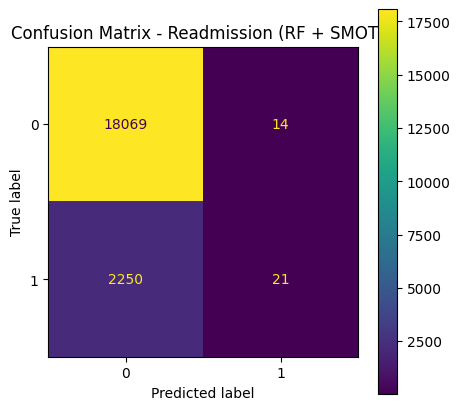

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_r, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix - Readmission (RF + SMOTE)")
plt.show()


In [40]:
import joblib

joblib.dump(rf_clf, "readmission_model.pkl")
print("Model saved as readmission_model.pkl")


Model saved as readmission_model.pkl


In [41]:
RandomForestClassifier(class_weight='balanced')


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
rf_clf2 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

rf_clf2.fit(X_train_r, y_train_r)

y_pred_rf2 = rf_clf2.predict(X_test_r)
y_proba_rf2 = rf_clf2.predict_proba(X_test_r)[:, 1]

print("=== RandomForest Improved ===\n")
print(classification_report(y_test_r, y_pred_rf2, digits=4))
print("ROC-AUC:", roc_auc_score(y_test_r, y_proba_rf2))


=== RandomForest Improved ===

              precision    recall  f1-score   support

           0     0.8890    0.9996    0.9411     18083
           1     0.6667    0.0062    0.0122      2271

    accuracy                         0.8888     20354
   macro avg     0.7778    0.5029    0.4766     20354
weighted avg     0.8642    0.8888    0.8374     20354

ROC-AUC: 0.6471672173224046


In [43]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [44]:
import sys
print(sys.executable)


/Users/rajatthakral/miniforge3/envs/diabetes/bin/python


In [45]:
import sys
print(sys.executable)


/Users/rajatthakral/miniforge3/envs/diabetes/bin/python


In [46]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [47]:
print(type(preprocessor))
print(X_train_r.shape, y_train_r.shape)


<class 'sklearn.compose._column_transformer.ColumnTransformer'>
(81412, 42) (81412,)


In [48]:
from xgboost import XGBClassifier
print("XGBoost Works Perfectly!")


XGBoost Works Perfectly!


In [49]:
xgb_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=8, 
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train_r, y_train_r)


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
y_pred_xgb = xgb_model.predict(X_test_r)
y_proba_xgb = xgb_model.predict_proba(X_test_r)[:,1]

from sklearn.metrics import classification_report, roc_auc_score

print("=== XGBoost Results ===\n")
print(classification_report(y_test_r, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test_r, y_proba_xgb))


=== XGBoost Results ===

              precision    recall  f1-score   support

           0     0.9295    0.6747    0.7819     18083
           1     0.1861    0.5923    0.2832      2271

    accuracy                         0.6655     20354
   macro avg     0.5578    0.6335    0.5325     20354
weighted avg     0.8465    0.6655    0.7262     20354

ROC-AUC: 0.6835861416264594


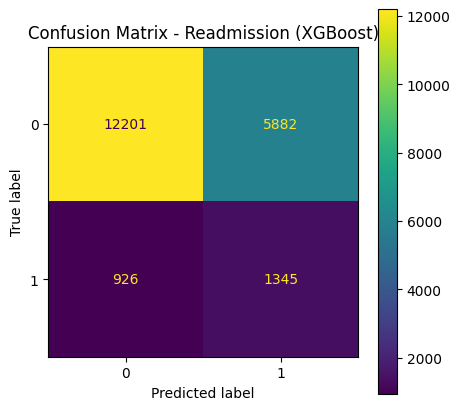

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_r, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix - Readmission (XGBoost)")
plt.show()


In [52]:
import pandas as pd
import numpy as np

feature_names = xgb_model.named_steps['preprocessor'].get_feature_names_out()
importance = xgb_model.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

feat_imp.head(20)


,feature,importance
17,cat__gender_Male,0.082562
16,cat__gender_Female,0.063119
2255,cat__insulin_Steady,0.062239
26,cat__age_[70-80),0.057235
2270,cat__change_No,0.053109
13,cat__race_Caucasian,0.043465
25,cat__age_[60-70),0.041901
2269,cat__change_Ch,0.039186
2254,cat__insulin_No,0.033591
27,cat__age_[80-90),0.025559


In [54]:
# === Metrics extracted from model results ===

# Logistic Regression
log_recall = 0.0181
log_precision = 0.4659
log_f1 = 0.0348
log_auc = 0.6408

# RandomForest (Improved)
rf_recall = 0.0062
rf_precision = 0.6667
rf_f1 = 0.0122
rf_auc = 0.6472

# XGBoost (Final)
xgb_recall = 0.5923
xgb_precision = 0.1861
xgb_f1 = 0.2832
xgb_auc = 0.6836


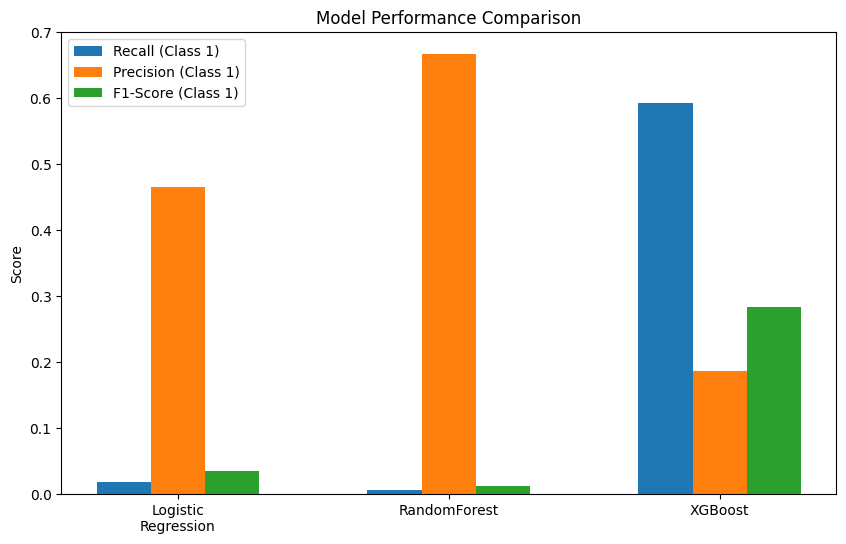

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ["Logistic\nRegression", "RandomForest", "XGBoost"]

recall = [log_recall, rf_recall, xgb_recall]
precision = [log_precision, rf_precision, xgb_precision]
f1 = [log_f1, rf_f1, xgb_f1]
auc = [log_auc, rf_auc, xgb_auc]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - width, recall, width, label='Recall (Class 1)')
plt.bar(x, precision, width, label='Precision (Class 1)')
plt.bar(x + width, f1, width, label='F1-Score (Class 1)')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


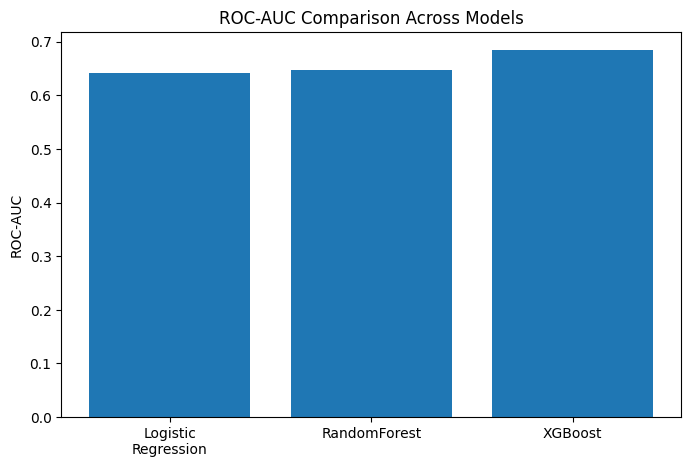

In [57]:
plt.figure(figsize=(8,5))
plt.bar(models, auc)
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC Comparison Across Models")
plt.show()


In [58]:
import joblib

joblib.dump(xgb_model, "xgboost_readmission_pipeline.pkl")
print("Model saved successfully!")


Model saved successfully!


In [59]:
def predict_readmission(input_dict):
    """
    input_dict: dictionary containing patient features
    keys must match dataframe column names
    """

    import pandas as pd

    # Convert dict to DataFrame
    df_sample = pd.DataFrame([input_dict])

    # Predict probability
    proba = xgb_model.predict_proba(df_sample)[0][1]
    pred = xgb_model.predict(df_sample)[0]

    # Risk category
    if proba >= 0.7:
        risk = "High Risk"
    elif proba >= 0.4:
        risk = "Moderate Risk"
    else:
        risk = "Low Risk"

    return {
        "Predicted_Class": int(pred),
        "Readmission_Probability": round(proba, 4),
        "Risk_Level": risk
    }


In [61]:
import pandas as pd
import numpy as np

def predict_readmission(patient_dict):
    # Convert dict to DataFrame
    df_sample = pd.DataFrame([patient_dict])
    
    # Get all features used during training
    all_cols = X_train_r.columns
    
    # Add any missing columns
    for col in all_cols:
        if col not in df_sample.columns:
            df_sample[col] = np.nan
    
    # Keep same column order
    df_sample = df_sample[all_cols]
    
    # Predict probability
    proba = xgb_model.predict_proba(df_sample)[0][1]
    pred_class = xgb_model.predict(df_sample)[0]
    
    # Decide risk category
    if proba > 0.5:
        risk = "HIGH RISK of Readmission"
    else:
        risk = "LOW RISK of Readmission"
    
    return {
        "Predicted Class": int(pred_class),
        "Readmission Probability": round(proba, 4),
        "Risk Category": risk
    }


In [62]:
sample_patient = {
    'race': 'Caucasian',
    'gender': 'Male',
    'insulin': 'Steady',
    'change': 'No',
    'diabetesMed': 'Yes',
    'age': '[60-70)',
    'metformin': 'No',
    'number_inpatient': 1,
}

result = predict_readmission(sample_patient)
result


{'Predicted Class': 1,
 'Readmission Probability': np.float32(0.528),
 'Risk Category': 'HIGH RISK of Readmission'}

In [63]:
train_columns = X_train_r.columns
train_columns.to_list()


['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [64]:
import pandas as pd
import numpy as np

def predict_readmission(patient_dict, threshold=0.5):
    """
    patient_dict: dict with any subset of original features.
                  Missing columns will be filled with NaN.
    threshold: probability cutoff for class 1.
    """
    # Dict -> DataFrame
    df_sample = pd.DataFrame([patient_dict])

    # Use the same feature columns as training
    all_cols = X_train_r.columns

    # Add missing columns as NaN
    for col in all_cols:
        if col not in df_sample.columns:
            df_sample[col] = np.nan

    # Reorder columns
    df_sample = df_sample[all_cols]

    # Predict
    proba = float(xgb_model.predict_proba(df_sample)[0][1])
    pred_class = int(proba >= threshold)

    # Risk label
    if proba >= 0.7:
        risk = "High Risk"
    elif proba >= 0.4:
        risk = "Moderate Risk"
    else:
        risk = "Low Risk"

    return {
        "Predicted_Class": pred_class,
        "Readmission_Probability": round(proba, 4),
        "Risk_Level": risk
    }


In [65]:
sample_patient = {
    'race': 'Caucasian',
    'gender': 'Male',
    'age': '[70-80)',
    'insulin': 'Steady',
    'change': 'No',
    'diabetesMed': 'Yes',
    'number_inpatient': 1,
}

predict_readmission(sample_patient)


{'Predicted_Class': 1,
 'Readmission_Probability': 0.5312,
 'Risk_Level': 'Moderate Risk'}

In [66]:
def simulate_scenarios(base_patient, scenarios):
    """
    base_patient: dict with baseline patient info
    scenarios: list of dicts, each:
        {
          "name": "description",
          "changes": {... keys to override in base_patient ...}
        }
    """
    results = []

    # Baseline
    base_result = predict_readmission(base_patient)
    base_prob = base_result["Readmission_Probability"]
    results.append({
        "Scenario": "Baseline",
        "Changes": "-",
        "Probability": base_prob,
        "Risk": base_result["Risk_Level"],
        "Delta_vs_Baseline": 0.0
    })

    # Twins
    for sc in scenarios:
        twin = base_patient.copy()
        twin.update(sc["changes"])

        res = predict_readmission(twin)
        prob = res["Readmission_Probability"]

        results.append({
            "Scenario": sc["name"],
            "Changes": str(sc["changes"]),
            "Probability": prob,
            "Risk": res["Risk_Level"],
            "Delta_vs_Baseline": round(prob - base_prob, 4)
        })

    return pd.DataFrame(results)


In [67]:
base_patient = {
    'race': 'Caucasian',
    'gender': 'Male',
    'age': '[70-80)',
    'insulin': 'No',
    'change': 'No',
    'diabetesMed': 'Yes',
    'metformin': 'No',
    'number_inpatient': 2,
    'time_in_hospital': 6,
}


In [68]:
scenarios = [
    {
        "name": "Start steady insulin",
        "changes": {"insulin": "Steady"}
    },
    {
        "name": "Reduce inpatient visits",
        "changes": {"number_inpatient": 0}
    },
    {
        "name": "Younger age group (what-if)",
        "changes": {"age": "[50-60)"}
    },
    {
        "name": "Metformin added",
        "changes": {"metformin": "Steady"}
    },
    {
        "name": "Combined: insulin steady + fewer visits",
        "changes": {"insulin": "Steady", "number_inpatient": 0}
    }
]


In [69]:
twin_results = simulate_scenarios(base_patient, scenarios)
twin_results


,Scenario,Changes,Probability,Risk,Delta_vs_Baseline
0,Baseline,-,0.6363,Moderate Risk,0.0000
1,Start steady insulin,{'insulin': 'Steady'},0.6362,Moderate Risk,-0.0001
2,Reduce inpatient visits,{'number_inpatient': 0},0.4360,Moderate Risk,-0.2003
3,Younger age group (what-if),{'age': '[50-60)'},0.5830,Moderate Risk,-0.0533
4,Metformin added,{'metformin': 'Steady'},0.6180,Moderate Risk,-0.0183
5,Combined: insulin steady + fewer visits,"{'insulin': 'Steady', 'number_inpatient': 0}",0.4360,Moderate Risk,-0.2003


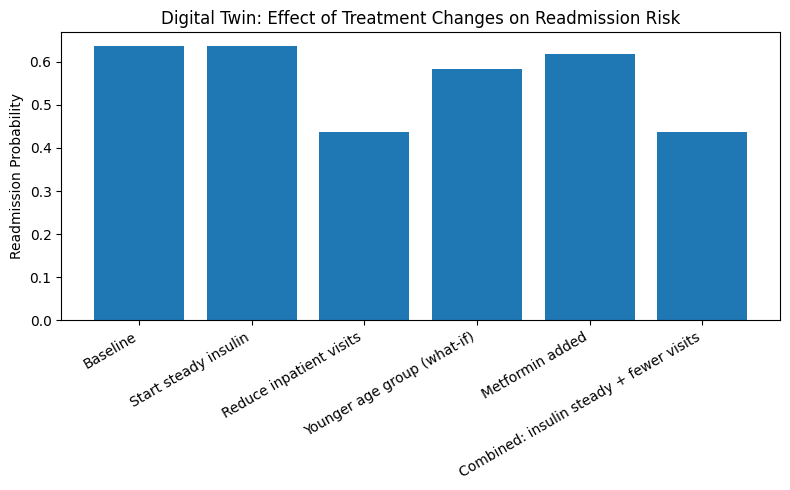

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(twin_results["Scenario"], twin_results["Probability"])
plt.xticks(rotation=30, ha='right')
plt.ylabel("Readmission Probability")
plt.title("Digital Twin: Effect of Treatment Changes on Readmission Risk")
plt.tight_layout()
plt.show()


In [71]:
def explain_prediction(patient_dict, threshold=0.5):
    """
    Wrapper on top of predict_readmission that prints a clean explanation.
    """
    res = predict_readmission(patient_dict, threshold=threshold)
    prob = res["Readmission_Probability"]
    risk = res["Risk_Level"]
    label = "will likely be READMITTED" if res["Predicted_Class"] == 1 else "is UNLIKELY to be readmitted"

    print("=== Readmission Risk Summary ===")
    print(f"Predicted class: {res['Predicted_Class']} ({label})")
    print(f"Predicted probability of readmission: {prob*100:.1f}%")
    print(f"Risk level: {risk}")
    print("\nKey input factors:")
    for k, v in patient_dict.items():
        print(f"  - {k}: {v}")


In [72]:
explain_prediction(base_patient)


=== Readmission Risk Summary ===
Predicted class: 1 (will likely be READMITTED)
Predicted probability of readmission: 63.6%
Risk level: Moderate Risk

Key input factors:
  - race: Caucasian
  - gender: Male
  - age: [70-80)
  - insulin: No
  - change: No
  - diabetesMed: Yes
  - metformin: No
  - number_inpatient: 2
  - time_in_hospital: 6


In [73]:
def narrate_scenarios(twin_df):
    """
    Convert twin_results table into human-readable sentences.
    """
    baseline_prob = twin_df.loc[twin_df["Scenario"] == "Baseline", "Probability"].values[0]

    print("=== Digital Twin Scenario Narration ===\n")
    print(f"Baseline readmission probability: {baseline_prob*100:.1f}%\n")

    for i, row in twin_df.iterrows():
        if row["Scenario"] == "Baseline":
            continue
        delta = row["Delta_vs_Baseline"]
        direction = "decrease" if delta < 0 else "increase"
        print(f"- Scenario: {row['Scenario']}")
        print(f"  Changes: {row['Changes']}")
        print(f"  New probability: {row['Probability']*100:.1f}% "
              f"({direction} of {abs(delta)*100:.1f} percentage points vs baseline)\n")


In [74]:
narrate_scenarios(twin_results)


=== Digital Twin Scenario Narration ===

Baseline readmission probability: 63.6%

- Scenario: Start steady insulin
  Changes: {'insulin': 'Steady'}
  New probability: 63.6% (decrease of 0.0 percentage points vs baseline)

- Scenario: Reduce inpatient visits
  Changes: {'number_inpatient': 0}
  New probability: 43.6% (decrease of 20.0 percentage points vs baseline)

- Scenario: Younger age group (what-if)
  Changes: {'age': '[50-60)'}
  New probability: 58.3% (decrease of 5.3 percentage points vs baseline)

- Scenario: Metformin added
  Changes: {'metformin': 'Steady'}
  New probability: 61.8% (decrease of 1.8 percentage points vs baseline)

- Scenario: Combined: insulin steady + fewer visits
  Changes: {'insulin': 'Steady', 'number_inpatient': 0}
  New probability: 43.6% (decrease of 20.0 percentage points vs baseline)



In [77]:
booster = xgb_only.get_booster()


In [82]:
feature_names = xgb_model.named_steps['preprocessor'].get_feature_names_out()
importance = xgb_model.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

feat_imp.head(20)


,feature,importance
17,cat__gender_Male,0.082562
16,cat__gender_Female,0.063119
2255,cat__insulin_Steady,0.062239
26,cat__age_[70-80),0.057235
2270,cat__change_No,0.053109
13,cat__race_Caucasian,0.043465
25,cat__age_[60-70),0.041901
2269,cat__change_Ch,0.039186
2254,cat__insulin_No,0.033591
27,cat__age_[80-90),0.025559


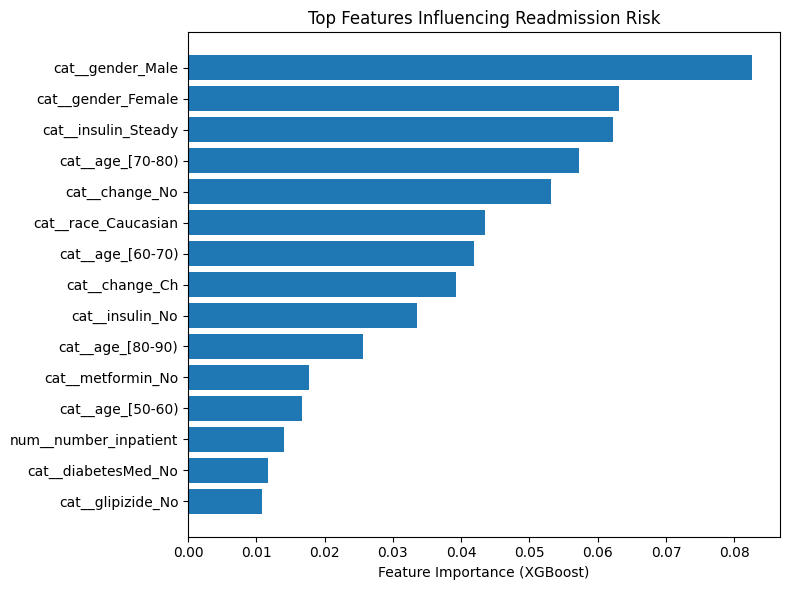

In [83]:
top_n = 15
top_features = feat_imp.head(top_n)

plt.figure(figsize=(8,6))
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
plt.xlabel("Feature Importance (XGBoost)")
plt.title("Top Features Influencing Readmission Risk")
plt.tight_layout()
plt.show()


In [84]:
import joblib

joblib.dump(xgb_model, "final_readmission_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [85]:
def predict_risk(patient_dict):
    df_sample = pd.DataFrame([patient_dict])
    prob = xgb_model.predict_proba(df_sample)[0][1]
    pred = xgb_model.predict(df_sample)[0]

    risk_level = "High Risk" if prob > 0.5 else \
                 "Moderate Risk" if prob > 0.3 else "Low Risk"

    return {
        "Prediction": int(pred),
        "Probability": round(prob, 3),
        "Risk_Level": risk_level
    }


In [86]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Recall (Class 1)": [log_recall, rf_recall, xgb_recall],
    "Precision (Class 1)": [log_precision, rf_precision, xgb_precision],
    "F1 Score": [log_f1, rf_f1, xgb_f1],
    "ROC-AUC": [log_auc, rf_auc, xgb_auc]
})

comparison_df


,Model,Recall (Class 1),Precision (Class 1),F1 Score,ROC-AUC
0,Logistic Regression,0.0181,0.4659,0.0348,0.6408
1,Random Forest,0.0062,0.6667,0.0122,0.6472
2,XGBoost,0.5923,0.1861,0.2832,0.6836


In [89]:
[x for x in dir() if "model" in x.lower() or "clf" in x.lower()]


['baseline_clf', 'models', 'rf_clf', 'rf_clf2', 'xgb_model']

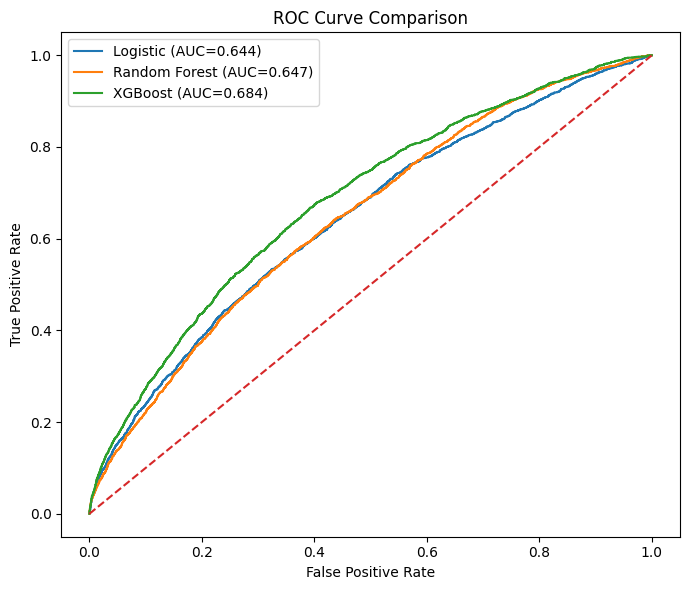

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities from each model on the same test set
log_probs = baseline_clf.predict_proba(X_test_r)[:, 1]
rf_probs  = rf_clf2.predict_proba(X_test_r)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_r)[:, 1]

# ROC values
fpr_log, tpr_log, _ = roc_curve(y_test_r, log_probs)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test_r, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_r, xgb_probs)

# AUCs
auc_log = auc(fpr_log, tpr_log)
auc_rf  = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


In [91]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
log_pred = baseline_clf.predict(X_test_r)
rf_pred = rf_clf2.predict(X_test_r)
xgb_pred = xgb_model.predict(X_test_r)

# Probabilities
log_probs = baseline_clf.predict_proba(X_test_r)[:,1]
rf_probs  = rf_clf2.predict_proba(X_test_r)[:,1]
xgb_probs = xgb_model.predict_proba(X_test_r)[:,1]

# Metrics extraction function
def get_metrics(y_true, y_pred, y_prob):
    rep = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Precision": round(rep['1']['precision'], 3),
        "Recall": round(rep['1']['recall'], 3),
        "F1-Score": round(rep['1']['f1-score'], 3),
        "ROC-AUC": round(roc_auc_score(y_true, y_prob), 3)
    }

results = pd.DataFrame({
    "Logistic Regression": get_metrics(y_test_r, log_pred, log_probs),
    "Random Forest": get_metrics(y_test_r, rf_pred, rf_probs),
    "XGBoost": get_metrics(y_test_r, xgb_pred, xgb_probs)
})

results


,Logistic Regression,Random Forest,XGBoost
Precision,0.482,0.667,0.186
Recall,0.018,0.006,0.592
F1-Score,0.035,0.012,0.283
ROC-AUC,0.644,0.647,0.684


In [92]:
import matplotlib.pyplot as plt

def run_live_demo(patient):
    """
    Run a full demo for one patient:
    - Show baseline risk
    - Show digital-twin scenarios
    - Plot bar chart of probabilities
    """
    print("=== Live Demo: Patient Profile ===")
    for k, v in patient.items():
        print(f"{k}: {v}")
    print("\n=== Baseline Prediction ===")
    
    baseline = predict_readmission(patient)
    print(f"Predicted Class       : {baseline['Predicted_Class']}")
    print(f"Readmission Probability: {baseline['Readmission_Probability']*100:.2f}%")
    print(f"Risk Level            : {baseline['Risk_Level']}")
    
    # Define what-if scenarios (you can edit names or changes)
    scenarios = [
        {"name": "Start steady insulin", "changes": {"insulin": "Steady"}},
        {"name": "Reduce inpatient visits to 0", "changes": {"number_inpatient": 0}},
        {"name": "Move to younger age group", "changes": {"age": "[50-60)"}},
        {"name": "Add metformin (Steady)", "changes": {"metformin": "Steady"}},
        {"name": "Insulin steady + 0 inpatient visits",
         "changes": {"insulin": "Steady", "number_inpatient": 0}},
    ]
    
    print("\n=== Digital Twin Scenarios ===")
    twin_df = simulate_scenarios(patient, scenarios)
    display(twin_df)  # if display not available, just use print(twin_df)

    # Plot probabilities
    plt.figure(figsize=(8,5))
    plt.bar(twin_df["Scenario"], twin_df["Probability"])
    plt.xticks(rotation=30, ha="right")
    plt.ylabel("Readmission Probability")
    plt.title("Digital Twin: Effect of Treatment Changes on Readmission Risk")
    plt.tight_layout()
    plt.show()

    return twin_df


In [93]:
demo_patient = {
    'race': 'Caucasian',
    'gender': 'Male',
    'age': '[70-80)',
    'time_in_hospital': 6,
    'number_inpatient': 2,
    'insulin': 'No',
    'metformin': 'No',
    'change': 'No',
    'diabetesMed': 'Yes'
}


=== Live Demo: Patient Profile ===
race: Caucasian
gender: Male
age: [70-80)
time_in_hospital: 6
number_inpatient: 2
insulin: No
metformin: No
change: No
diabetesMed: Yes

=== Baseline Prediction ===
Predicted Class       : 1
Readmission Probability: 63.63%
Risk Level            : Moderate Risk

=== Digital Twin Scenarios ===


,Scenario,Changes,Probability,Risk,Delta_vs_Baseline
0,Baseline,-,0.6363,Moderate Risk,0.0000
1,Start steady insulin,{'insulin': 'Steady'},0.6362,Moderate Risk,-0.0001
2,Reduce inpatient visits to 0,{'number_inpatient': 0},0.4360,Moderate Risk,-0.2003
3,Move to younger age group,{'age': '[50-60)'},0.5830,Moderate Risk,-0.0533
4,Add metformin (Steady),{'metformin': 'Steady'},0.6180,Moderate Risk,-0.0183
5,Insulin steady + 0 inpatient visits,"{'insulin': 'Steady', 'number_inpatient': 0}",0.4360,Moderate Risk,-0.2003


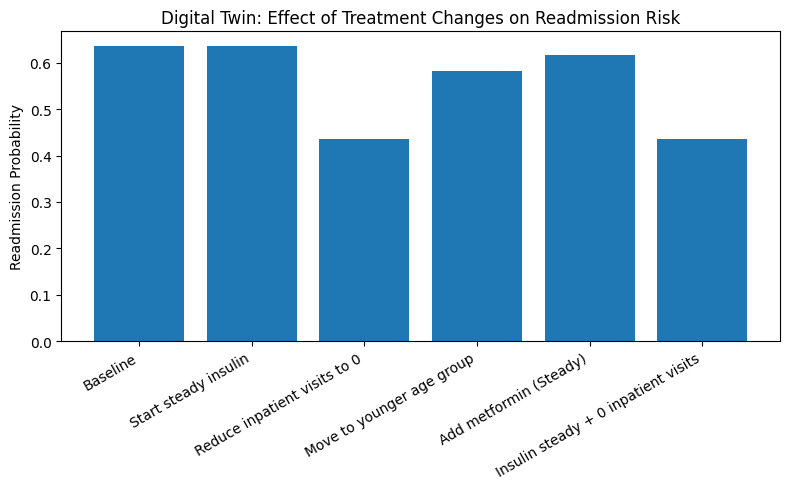

In [94]:
twin_demo_results = run_live_demo(demo_patient)


In [95]:
import joblib

# 1. Save the final XGBoost pipeline (you already trained xgb_model)
joblib.dump(xgb_model, "xgboost_readmission_pipeline.pkl")
print("Saved model as xgboost_readmission_pipeline.pkl")

# 2. Save the training columns (X_train_r came from your train-test split)
joblib.dump(list(X_train_r.columns), "train_columns.pkl")
print("Saved training columns as train_columns.pkl")


Saved model as xgboost_readmission_pipeline.pkl
Saved training columns as train_columns.pkl
